In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

file = pd.read_csv('Life_Expectancy_Data.csv')

#I imported the relevant libraries

In [32]:
file.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
file1 = file.drop(['Status','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources'], axis='columns')

file1

#I removed all the unnecessary columns from the data file to make the data cleaner and more readable

#I decided that the following four should be the training variables:
# Schooling(in years) 
# GDP
# HIV/AIDS(percentage population contracted the disease)
# Adult Mortality(The probability of dying between the ages of 15 and 60 years (per 1 000 population) per year ) 

#After carefully observing the dataset, i cam to the conclusion that these the the factors which affected the Life Expectancy
#the most. So i started the Exploratory data analysis of the above four columns.

,Country,Year,Life_expectancy,Adult Mortality,HIV,GDP,Schooling
0,Afghanistan,2015,65.0,263.0,0.1,584.259210,10.1
1,Afghanistan,2014,59.9,271.0,0.1,612.696514,10.0
2,Afghanistan,2013,59.9,268.0,0.1,631.744976,9.9
3,Afghanistan,2012,59.5,272.0,0.1,669.959000,9.8
4,Afghanistan,2011,59.2,275.0,0.1,63.537231,9.5
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,33.6,454.366654,9.2
2934,Zimbabwe,2003,44.5,715.0,36.7,453.351155,9.5
2935,Zimbabwe,2002,44.8,73.0,39.8,57.348340,10.0
2936,Zimbabwe,2001,45.3,686.0,42.1,548.587312,9.8


In [28]:
file1.isnull().sum()

#Used the isnull funtion to count the null(nA values)

Country               0
Year                  0
Life_expectancy      10
Adult Mortality      10
HIV                   0
GDP                 448
Schooling           163
dtype: int64

In [30]:
schooling_median = file1.Schooling.median()

print(schooling_median)

12.3


In [32]:
file1.Schooling =file1.Schooling.fillna(schooling_median)

#replaced all the null values with the median of the column

In [33]:
 file1.Schooling = file1.Schooling.replace(0, schooling_median)

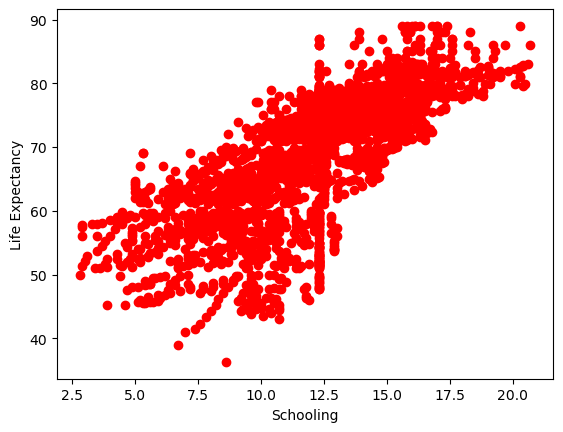

In [34]:
%matplotlib inline
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.scatter(file1.Schooling,file1['Life_expectancy '], color='red')

#plotted the Schooling vs Life Expectancy graph to determine outliers and which model is best suitable

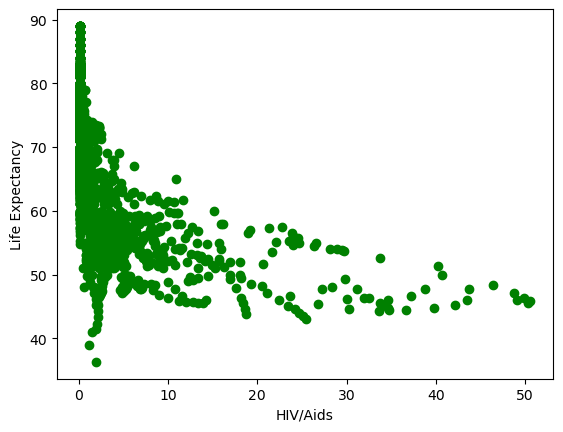

In [35]:
%matplotlib inline
plt.xlabel('HIV/Aids')
plt.ylabel('Life Expectancy')
plt.scatter(file1.HIV,file1['Life_expectancy '], color='green')



In [112]:
file2.isnull().sum()

#Since there are no null values in HIV/AIDs coulmn and judging by the graph the data doesnt have many outliers, i havent changed it much.

Country               0
Year                  0
Life_expectancy       0
Adult Mortality       0
HIV                   0
GDP                 373
Schooling             0
dtype: int64

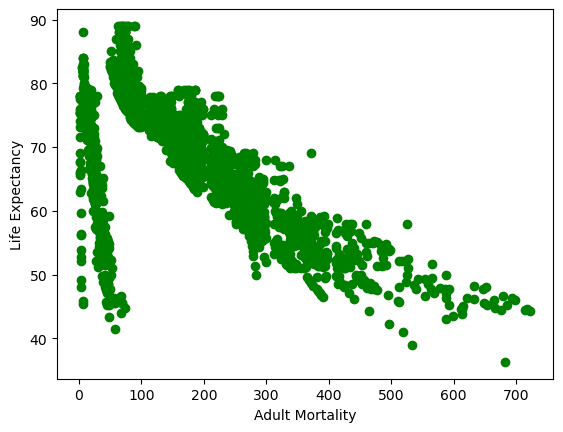

In [39]:
%matplotlib inline
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.scatter(file1['Adult Mortality'],file1['Life_expectancy '], color='green')

#Juging by the plot there are quite a few outliers in this column, i filtered out the rows in which Adult Mortality is less than 70

In [111]:
file2 = file1[file1['Adult Mortality'] > 70 ]

file2

,Country,Year,Life_expectancy,Adult Mortality,HIV,GDP,Schooling
0,Afghanistan,2015,65.0,263.0,0.1,584.259210,10.1
1,Afghanistan,2014,59.9,271.0,0.1,612.696514,10.0
2,Afghanistan,2013,59.9,268.0,0.1,631.744976,9.9
3,Afghanistan,2012,59.5,272.0,0.1,669.959000,9.8
4,Afghanistan,2011,59.2,275.0,0.1,63.537231,9.5
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,33.6,454.366654,9.2
2934,Zimbabwe,2003,44.5,715.0,36.7,453.351155,9.5
2935,Zimbabwe,2002,44.8,73.0,39.8,57.348340,10.0
2936,Zimbabwe,2001,45.3,686.0,42.1,548.587312,9.8


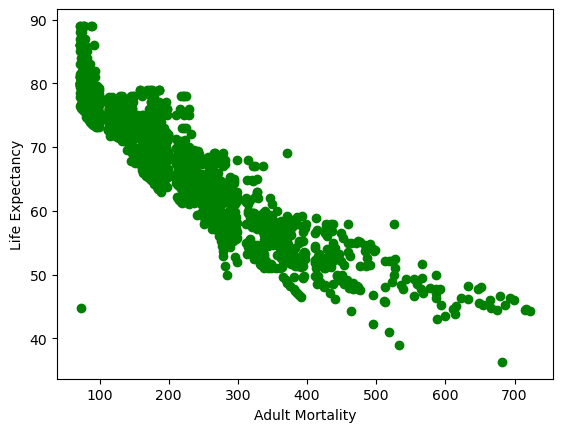

In [40]:
%matplotlib inline
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.scatter(file2['Adult Mortality'],file2['Life_expectancy '], color='green')
#As a result the outliers have been eliminated

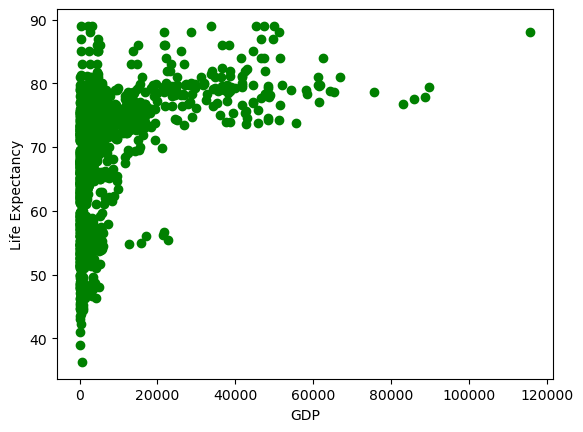

In [115]:
%matplotlib inline
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.scatter(file2.GDP,file2['Life_expectancy '], color='green')

#This GDP column has a lot of extremes in both the higher and lower range which makes it difficult to fit a line suitable
#for a linear regression model, so i used Percentile method to weed out the extremes and stored the date set into a new file"file3"

In [23]:
min_ = file2.GDP.quantile(0.10)
max_ = file2.GDP.quantile(0.90)


print(min_, max_)



144.84747940000003 15584.454399999997


In [51]:
file3 = file2[(file2.GDP<max_) & (file2.GDP>min_) ]

#The rows in the 90+ percentiles and the <10 percentiles were dropped

In [52]:
file3.GDP.describe()

count     1867.000000
mean      2731.455016
std       3123.735879
min        145.216300
25%        694.339517
50%       1563.603145
75%       3527.554971
max      15557.838100
Name: GDP, dtype: float64

In [113]:
file3.isnull().sum()

#As we can see, the null values have been  completely eradicated

Country             0
Year                0
Life_expectancy     0
Adult Mortality     0
HIV                 0
GDP                 0
Schooling           0
dtype: int64

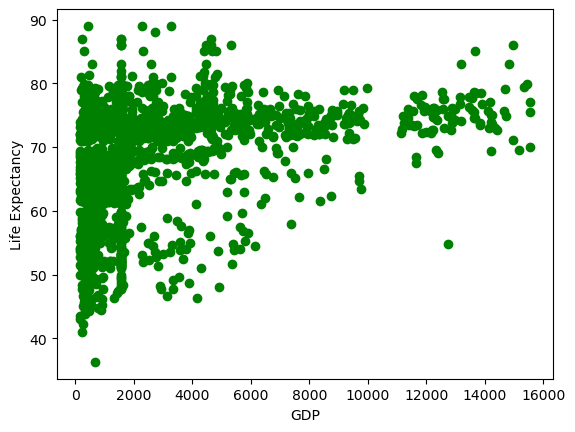

In [54]:
%matplotlib inline
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.scatter(file3.GDP,file3['Life_expectancy '], color='green')

#The graph looks much better.

In [116]:
reg = linear_model.LinearRegression()
reg.fit(file3[['Schooling', 'HIV', 'Adult Mortality', 'GDP']].values, file3['Life_expectancy '])

# I prepared a linear Regression model with the training values of Schooling, HIV, Adult Mortality, and GDP 
#after cleaning and optimising the data using exploratory data analysis. The independent variabkle or featere is the Life expectancy
# The model gioves very accurate results as shown by the test cases below.

LinearRegression()

In [117]:
reg.predict([[16.1, 0.1, 83,4838 ]])

#Actual Life Expectancy was 81.5, France 2012
# so an error of 1.55 years

array([79.95260038])

In [118]:
reg.predict([[5, 3.3, 289,1214 ]])

#Actual Life Expectancy was 62, Dijibouti 2008
# so an error of 3.78 years

array([58.22828616])

In [119]:
reg.predict([[8.9, 13.2, 432, 458.8]])

#Actual Life Expectancy was 53
# so an error of 0.03 years


array([52.97926146])

In [120]:
reg.predict([[13.3, 0.1, 78,4335 ]])

#Actual Life Expectancy was 76.7, UAE 2013
# so an error of 1.77 years

array([78.4704013])

In [121]:
reg.predict([[13.7, 0.1, 79,1121 ]])

#Actual Life Expectancy was 77.8, Malta 2001
# so an error of 0.99 years

array([78.49351373])

In [122]:
reg.predict([[14.9, 0.1, 195 ,4546]])

#Actual Life Expectancy was 69.4, Fiji 2012
# so an error of 1.48 years

array([70.88670536])

In [123]:
reg.predict([[9.7, 20.5, 632,325 ]])

#Actual Life Expectancy was 48.2, Zimbabwe, 2008
# so an error of 7.41 years

array([40.79617478])